In [1]:
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


# Task 6. Preparing data for fit
1. Create data_fit dictionary containing data from  N first rows of dataframe

In [5]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')
N = 100
data_fit={'N': N, 'weight': d['weight'].head(N), 'heights': d['height'].head(N)}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


# Task 7. Evaluating model
1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.

In [6]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,height[91],height[92],height[93],height[94],height[95],height[96],height[97],height[98],height[99],height[100]
0,-228.432,0.913122,0.104094,5.0,31.0,0.0,229.792,119.083,0.751989,5.41972,...,154.540,155.951,159.244,163.271,144.622,163.432,146.376,156.758,141.968,157.568
1,-225.906,1.000000,0.104094,2.0,3.0,0.0,228.403,120.067,0.761550,5.40665,...,155.327,164.043,157.375,155.903,149.722,154.039,155.632,165.763,156.296,152.437
2,-225.007,0.897749,0.104094,5.0,31.0,0.0,227.196,110.801,0.976445,5.42328,...,156.596,165.604,168.279,150.175,152.895,166.580,150.965,162.464,161.760,152.937
3,-225.030,0.883446,0.104094,2.0,3.0,0.0,226.447,109.941,0.963991,5.37142,...,165.332,156.442,156.268,165.511,150.293,166.170,149.561,160.900,171.906,154.262
4,-225.106,0.989123,0.104094,4.0,31.0,0.0,230.475,110.409,0.978283,5.91544,...,153.124,170.409,159.683,155.020,156.303,160.071,149.017,161.514,167.931,154.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-226.634,0.995978,0.133125,4.0,23.0,0.0,227.886,104.729,1.086420,5.40149,...,156.503,154.618,148.283,160.487,147.124,160.754,149.447,149.668,157.583,153.011
3996,-224.594,0.981333,0.133125,5.0,47.0,0.0,227.107,116.112,0.835909,5.42705,...,152.861,154.838,157.350,163.707,145.057,155.003,153.627,168.266,158.537,140.322
3997,-226.693,0.720502,0.133125,2.0,3.0,0.0,226.846,115.709,0.827389,5.45402,...,152.709,163.597,154.020,157.883,162.151,151.464,151.680,152.678,153.024,156.039
3998,-225.549,0.980910,0.133125,5.0,31.0,0.0,229.891,107.784,1.014730,5.21322,...,163.573,166.727,148.194,158.103,155.506,163.878,145.524,169.630,161.865,153.754


Min:  118.045
Max:  196.8879


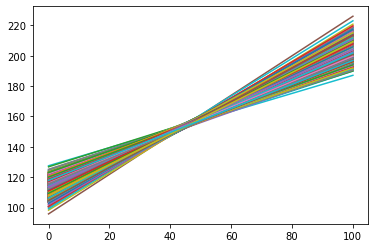

In [7]:
x = np.array([0,100])

for i in range(len(df)):
    y = df['beta'][i]*x + df['alpha'][i]
    plt.plot(x, y)

print('Min: ', np.min(y))
print('Max: ', np.max(y))

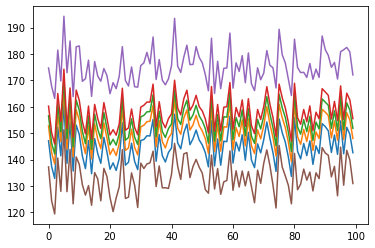

In [10]:
max = []
min = []
height = fit.stan_variable('height')
quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []

for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.plot(max)
plt.plot(min)
plt.show()